º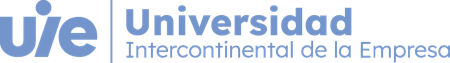

**G24GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2024-25

In [ ]:
__author__ = "Student Name"

# PL06. _K-means_ _Scratch_ Implementation

In this practice we will work on implementing the _K-means_ clustering algorithm. The goal is to implement the algorithm and test it with a synthetic dataset that can be generated with the `make_blobs` function from `sklearn.datasets`.

We will implement _K-means_ in an archetype class as in previous practices. The skeleton is provided _a posteriori_. Once the algorithm is implemented, the class will be exported to a `.py` file to be able to import it in the next _notebook_, where it will be tested with a real dataset and compared with the Scikit-Learn implementation.


In [96]:
from typing import Optional

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import sklearn.model_selection
from sklearn.datasets import make_blobs
import seaborn as sns

In [97]:
TEST_SPLIT_SIZE = 0.5
RANDOM_STATE = 7

# Set NumPy's random seed
np.random.seed(RANDOM_STATE)

## Dataset loading

In [98]:
data = make_blobs(
    n_samples = 150, 
    centers = 3,
    n_features = 3,
    random_state= RANDOM_STATE
)

X = data[0]


In [ ]:
def plot_data_3D(
    data: np.ndarray, labels: Optional[np.ndarray] = None, title: Optional[str] = None
) -> None:
    """
    Auxiliary function to plot data in 3D. `X` is expected to have 3 columns.

    :param X: Data to plot.
    :param labels: Data labels, for coloring them. If not provided, data is plotted in a single color.
    :param title: Graph title.
    """
    assert data.shape[1] == 3, "3 columns expected in X."

    # Use Seaborn style
    plt.style.use("ggplot") # Changed from seaborn 
    # Ignore the Matplotlib deprecation warnings
    plt.rcParams.update({"figure.max_open_warning": 0})

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection="3d")

    if labels is None:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], s=100)
    else:
        ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=labels, s=100, cmap=cm.jet)

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    if title is not None:
        ax.set_title(title)

    plt.show()

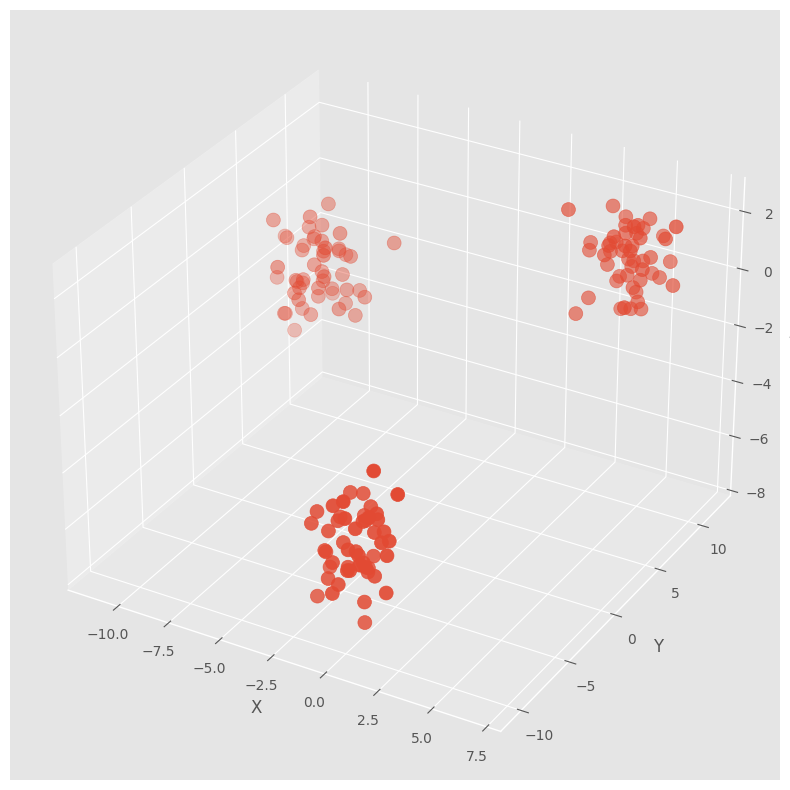

In [100]:
plot_data_3D(X)

## Data partitioning

A test subset is reserved.

In [101]:
X_train, X_test = sklearn.model_selection.train_test_split(
    X,
    test_size= TEST_SPLIT_SIZE,
    random_state= RANDOM_STATE)

## _K-means_ _Scratch_ Implementation

The _K-means_ algorithm is implemented in an archetype class.

In [ ]:
import numpy as np

class KMeansScratch:
    def __init__(self, k: int, max_iter: int = 300, random_state: int = None):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state
        self._centroids = None

    def fit(self, X: np.ndarray):
        # Initialization of centroids
        self._centroids = X[
            np.random.RandomState(self.random_state).choice(
                X.shape[0], self.k, replace=False
            )
        ]

        iters = self.max_iter

        while iters > 0:
            # Cluster assignment
            clusters = self._assign_clusters(X)

            # Update centroids
            new_centroids = self._update_centroids(X, clusters)

            # Stopping condition
            if np.all(self._centroids == new_centroids):
                break

            self._centroids = new_centroids
            iters -= 1

    def predict(self, X: np.ndarray) -> np.ndarray:
        return self._assign_clusters(X)

    def _assign_clusters(self, X: np.ndarray) -> np.ndarray:
        assigned_clusters = []
        for x in X:
            distances = [np.linalg.norm(x - centroid) for centroid in self._centroids]
            cluster = np.argmin(distances)
            assigned_clusters.append(cluster)
        return np.array(assigned_clusters)

    def _update_centroids(self, X: np.ndarray, clusters: np.ndarray) -> np.ndarray:
        new_centroids = np.zeros((self.k, X.shape[1]))
        for k in range(self.k):
            cluster_points = X[clusters == k]
            if len(cluster_points) > 0:
                new_centroids[k] = cluster_points.mean(axis=0)
        return new_centroids

## Model instantiation and training

In [ ]:
model = KMeansScratch(k = 3, random_state= RANDOM_STATE)
model.fit(X_train)
clusters_train = model.predict(X_train)
clusters_test = model.predict(X_test)


## Model evaluation


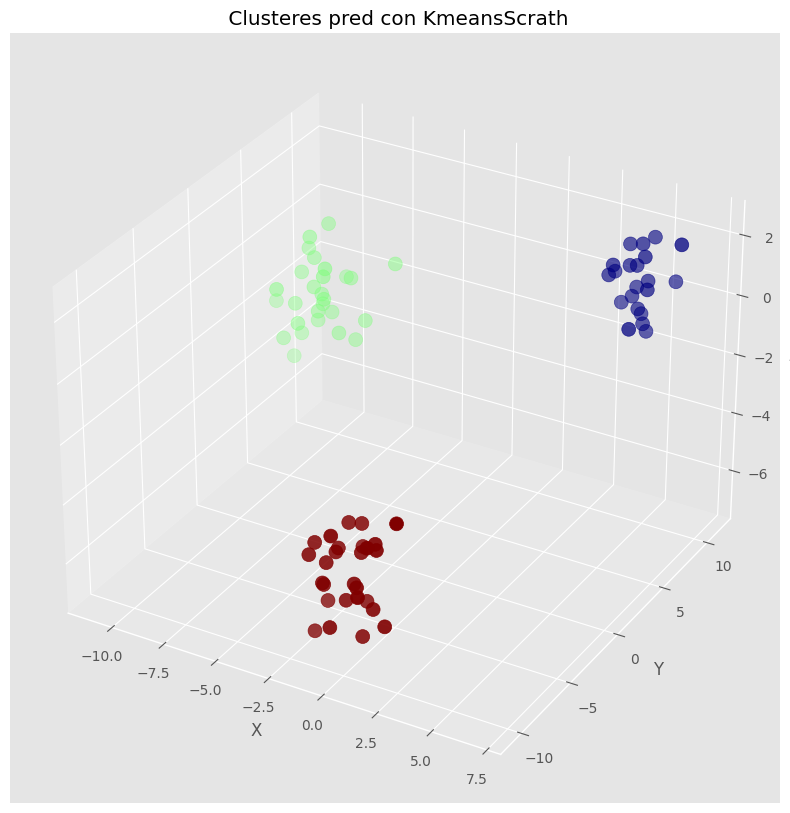

In [ ]:
plot_data_3D(
    X_test,
    labels=clusters_test,
    title="Predicted clusters with KmeansScratch"

)